In [3]:
import tensorflow as tf

In [4]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.10.0


In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_label),(test_image,test_label) = fashion_mnist.load_data()

In [7]:
# 归一化
train_image = train_image / 255
test_image = test_image /255

In [8]:
train_image.shape

(60000, 28, 28)

In [9]:
# 建立输入
input = keras.Input(shape=(28, 28))

In [10]:
x = keras.layers.Flatten()(input)

In [12]:
x = keras.layers.Dense(32, activation = "relu")(x)

In [13]:
x = keras.layers.Dropout(0.5)(x)

In [14]:
x = keras.layers.Dense(64, activation = "relu")(x)

In [15]:
output = keras.layers.Dense(10, activation = "softmax")(x)

In [16]:
model = keras.Model(inputs = input, outputs = output)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 10)                650   

In [18]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(train_image, train_label, epochs=10, validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7796 - acc: 0.7157 - val_loss: 0.4811 - val_acc: 0.8277
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5503 - acc: 0.8087 - val_loss: 0.4693 - val_acc: 0.8330
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4973 - acc: 0.8255 - val_loss: 0.4770 - val_acc: 0.8312
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - acc: 0.8320 - val_loss: 0.4419 - val_acc: 0.8443
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4494 - acc: 0.8395 - val_loss: 0.4811 - val_acc: 0.8177
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4359 - acc: 0.8455 - val_loss: 0.4413 - val_acc: 0.8430
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4252 - acc: 0.8490 - val_loss: 0.4400 - val_acc: 0.8291
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [21]:
test_loss, test_acc = model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.4200 - acc: 0.8512


In [22]:
test_loss

0.4200282692909241

In [23]:
test_acc

0.8511999845504761

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

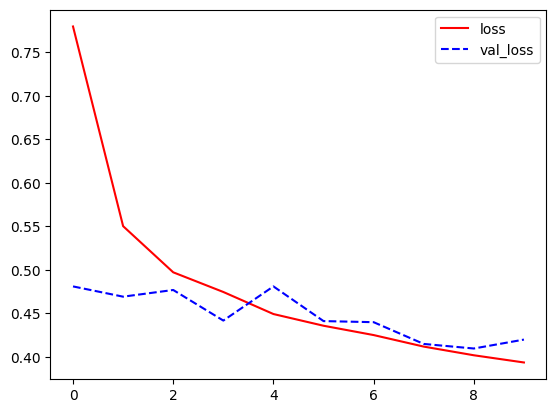

In [25]:
plt.plot(history.epoch, history.history["loss"], "r", label = "loss")
plt.plot(history.epoch, history.history["val_loss"], "b--", label = "val_loss")
plt.legend()

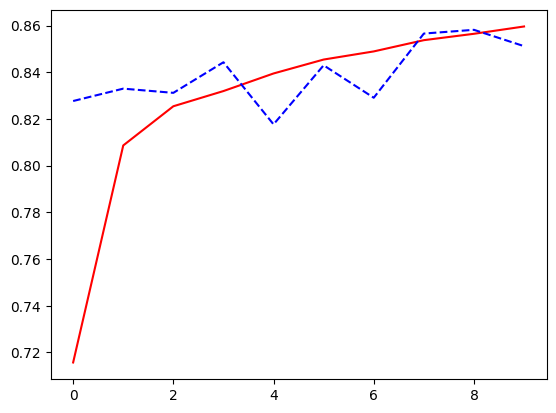

In [27]:
plt.plot(history.epoch, history.history['acc'], 'r')
plt.plot(history.epoch, history.history['val_acc'], 'b--')

## 两个输入参数的样子

In [28]:
input1 = keras.Input(shape=(28,28))
input2 = keras.Input(shape=(28,28))

In [29]:
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

In [30]:
x = keras.layers.concatenate([x1,x2])

In [31]:
x = keras.layers.Dense(32, activation = "relu")(x)

In [36]:
output = keras.layers.Dense(1, activation = "sigmoid")(x)

In [37]:
model = keras.Model(inputs=[input1, input2], outputs=output)

In [38]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 flatten_2 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                            